# Employee Churn Ananlysis

In [ ]:
Analyse employee churn

Finding out why employees are leaving the company

Predicting who will leave the company

We will figure out which features has the strongest impact on churning.

In [ ]:
# EDA

In [48]:
# lIBRARIES

import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [4]:
# LOADING DATASET

data = pandas.read_csv('HR_comma_sep.csv')
data.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Summarize Data

# Descriptive statistics
# We have 14999 instances to work with and can conﬁrm the data has 10 attributes
# including the class attribute.

# shape
print(data.shape)

(14999, 10)


In [9]:
from pandas import set_option

In [11]:
# Let’s also look at the data types of each attribute

# types
set_option('display.max_rows', 500)
print(data.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object


In [12]:
# Let’s now take a peek at the ﬁrst 20 rows of the data.
# head
set_option('display.width', 100)
print(data.head(20))

    satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  \
0                 0.38             0.53               2                   157                   3   
1                 0.80             0.86               5                   262                   6   
2                 0.11             0.88               7                   272                   4   
3                 0.72             0.87               5                   223                   5   
4                 0.37             0.52               2                   159                   3   
5                 0.41             0.50               2                   153                   3   
6                 0.10             0.77               6                   247                   4   
7                 0.92             0.85               5                   259                   5   
8                 0.89             1.00               5                   224              

In [13]:
# Things to note from the above

# (1) satisfaction_level and last_evaluation per employee ranges between 0-1
# (2) salary is ordinal

In [15]:
# Let’s summarize the distribution of each attribute
# descriptions, change precision to 3 places

set_option('precision', 3) # 3 decimal places
print(data.describe())

       satisfaction_level  last_evaluation  number_project  average_montly_hours  \
count           14999.000        14999.000       14999.000             14999.000   
mean                0.613            0.716           3.803               201.050   
std                 0.249            0.171           1.233                49.943   
min                 0.090            0.360           2.000                96.000   
25%                 0.440            0.560           3.000               156.000   
50%                 0.640            0.720           4.000               200.000   
75%                 0.820            0.870           5.000               245.000   
max                 1.000            1.000           7.000               310.000   

       time_spend_company  Work_accident       left  promotion_last_5years  
count           14999.000      14999.000  14999.000              14999.000  
mean                3.498          0.145      0.238                  0.021  
std         

In [17]:
# Let’s take a quick look at the breakdown of left.
# left distribution

print(data.groupby('left').size())

left
0    11428
1     3571
dtype: int64


In [18]:
print(data.groupby('left').mean())

      satisfaction_level  last_evaluation  number_project  average_montly_hours  \
left                                                                              
0                  0.667            0.715           3.787               199.060   
1                  0.440            0.718           3.856               207.419   

      time_spend_company  Work_accident  promotion_last_5years  
left                                                            
0                  3.380          0.175                  0.026  
1                  3.877          0.047                  0.005  


# Data Visualisation

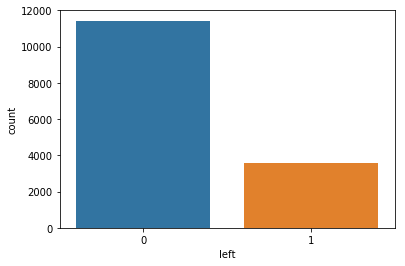

In [21]:
# Categorical variables

sns.countplot(x = 'left', data = data)

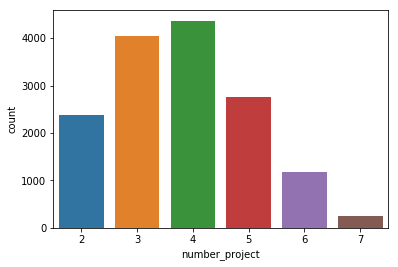

In [24]:
sns.countplot(x = 'number_project', data = data)

In [25]:
# All this is time consuming
# We will use seaborn subplots to plot all the categorical variables at once

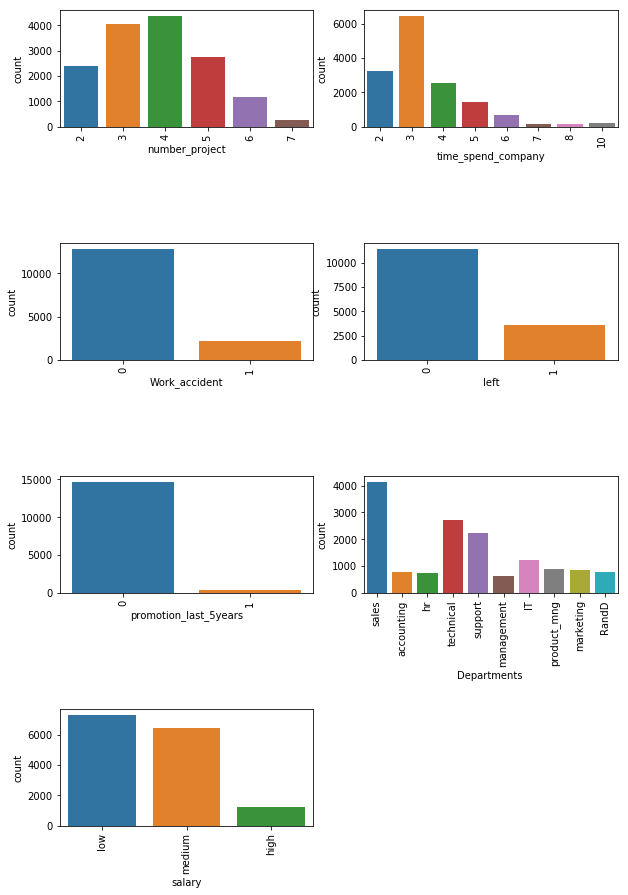

In [26]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)


In [27]:
# Multimodal Data Visualizations

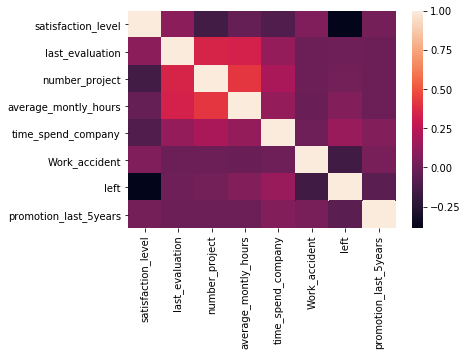

In [29]:
sns.heatmap(data.corr())

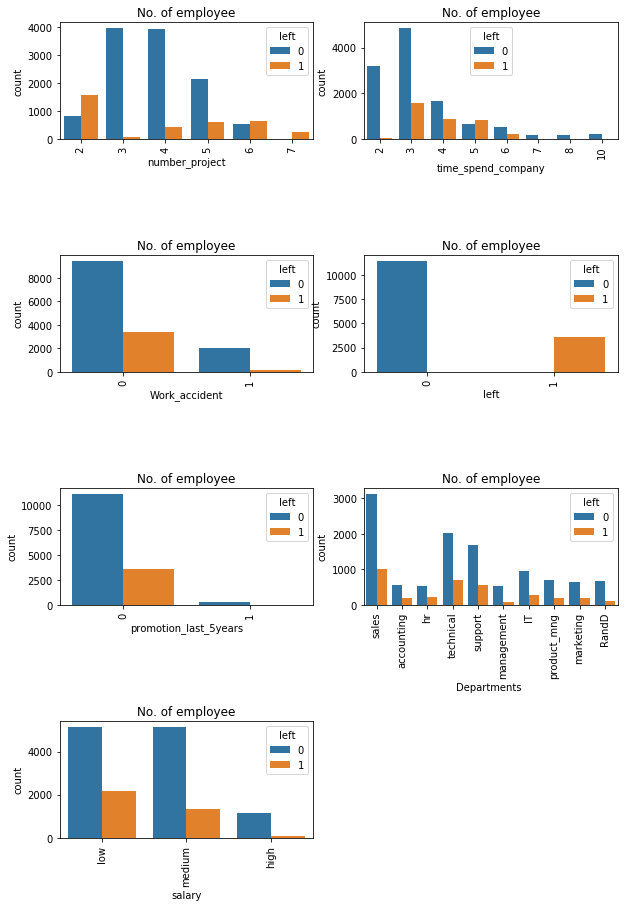

In [30]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")


# Model building and Cluster Analysis:

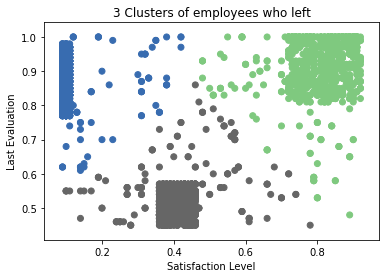

In [45]:
from sklearn.cluster import KMeans

# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()


In [46]:
# The blue indicates, low satisfaction and high evaluation
# The grey indicates, moderate satisfaction moderate evaluation
# The green indicates, high satisfaction and evaluation

# Data preprocessing

In [60]:
# converting categorical data

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null int64
salary                   14999 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [ ]:
# We will use a hold dataset for validation
# Something like a 70/30 split
# 70% for training and 30% for testing

In [62]:
# Prepare Data
validation_size = 0.30
seed = 7

#Spliting data into Feature

x=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']


# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)


In [63]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
predictions = logmodel.predict(x_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.92      0.86      3449
          1       0.47      0.23      0.31      1051

avg / total       0.72      0.76      0.73      4500



In [78]:
from sklearn.metrics import accuracy_score

In [79]:
print(accuracy_score(y_test, predictions))
    


0.7604444444444445


# Evaluate Algorithms: Baseline

In [53]:
# We don’t know what algorithms will do well on this dataset
# Let’s design our test harness
# We will use 10-fold cross-validation
# We will evaluate algorithms using the accuracy metric
# This is a gross metric that will give a quick idea of how correct a given model is
# More useful on binary classiﬁcation problems like this one

In [69]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [55]:
# spot-check a number of diﬀerent algorithms

# The six algorithms selected include: 2 Linear and 4 Nonlinear

# Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).
# Nonlinear Algorithms: Classiﬁcation and Regression Trees (CART), 
# Support Vector Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [70]:
# Spot Check Algorithms
# The algorithms all use default tuning parameters

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [71]:
# Printing the results
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.767025 (0.006239)
LDA: 0.764262 (0.006322)
KNN: 0.933233 (0.009133)
CART: 0.973902 (0.005340)
NB: 0.802840 (0.014595)
SVM: 0.950282 (0.005736)


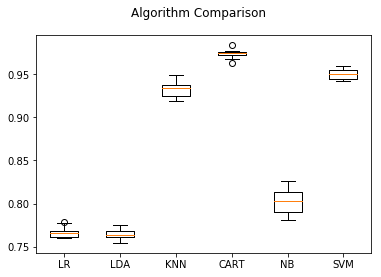

In [74]:
# It is always wise to look at the distribution of accuracy values calculated across 
# cross-validation folds

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Ensemble

In [83]:
# Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
# Bagging Methods: Random Forests (RF) and Extra Trees (ET).

# We will use the same test harness as before, 10-fold cross-validation
# No data standardization is used
# ensemble algorithms are based on decision trees that are less sensitive to data distributions.

# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.960949 (0.005993)
GBM: 0.977141 (0.005915)
RF: 0.987523 (0.004138)
ET: 0.986761 (0.002870)


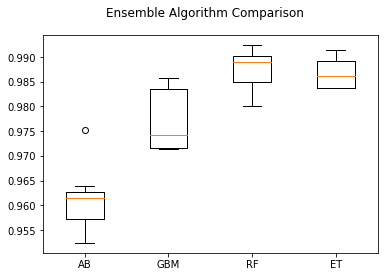

In [85]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [80]:
# gradient boosting

In [81]:
#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(x_test)


In [82]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))



Accuracy: 0.9751111111111112
Precision: 0.9718592964824121
Recall: 0.9200761179828735


# Final model

In [86]:
# Using SVM without Scaling

svc_model = SVC()

svc_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
predictions = svc_model.predict(x_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(confusion_matrix(y_test,predictions))

[[3306  143]
 [ 103  948]]


In [90]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.96      0.96      3449
          1       0.87      0.90      0.89      1051

avg / total       0.95      0.95      0.95      4500



In [91]:
# SVM with scaling

# prepare the model
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = SVC(C=1.5)
model.fit(rescaledX, y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(x_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


0.9606666666666667
[[3383   66]
 [ 111  940]]
             precision    recall  f1-score   support

          0       0.97      0.98      0.97      3449
          1       0.93      0.89      0.91      1051

avg / total       0.96      0.96      0.96      4500

